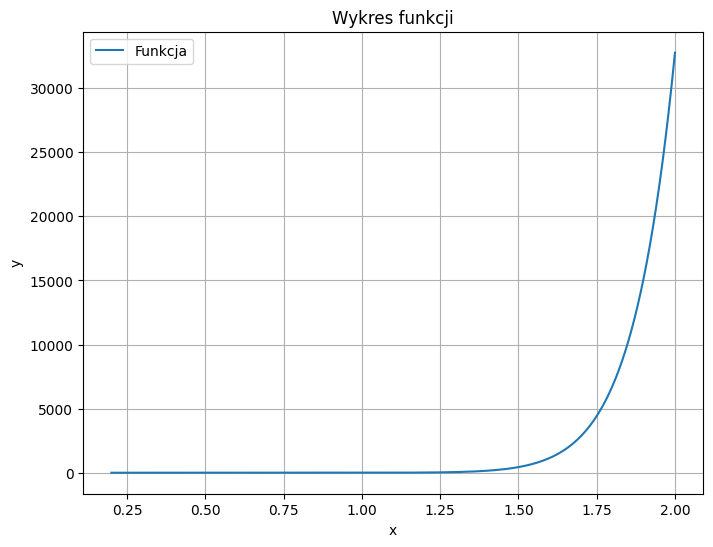

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = "{:,.5f}".format

def func1(x):
    n = 15
    m = 10
    y = x**n - (1-x)**m
    return y

def der_func1(x):
    n = 15
    m = 10
    deriv = n*x**(n-1) + m*(1-x)**(m-1)
    return deriv

plt.figure(figsize=(8,6))
X = np.arange(0.2, 2+0.01, 0.01)
plt.plot(X, func1(X), label = "Funkcja")
plt.title(f"Wykres funkcji")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

def newtons_method(func, der, x_0, epsilon, max_iter, stop_condition):
    x_n = x_0
    for n in range(max_iter):
        f_xn = func(x_n)
        der_fxn = der(x_n)
        if der_fxn == 0:
            # Zero derivative. No solution found.
            return None, None
        if stop_condition == "abs" and abs(f_xn) < epsilon:
            # Found solution
            return x_n, n
        elif stop_condition == "points" and abs(f_xn / der_fxn) < epsilon:
            # Found solution
            return x_n, n
        x_n -= f_xn / der_fxn
    # Exceeded maximum number of iterations. No solution found.
    return None, np.inf
def secant(func, x_1, x_2, epsilon, max_iter, stop_condition):
    for n in range(max_iter):
        if func(x_1) == func(x_2):
            # Divided by zero
            return None, None
        x_1, x_2 = x_2, x_2 - (x_2 - x_1) * func(x_2) / (func(x_2) - func(x_1))
        if stop_condition == "abs" and abs(func(x_2)) < epsilon:
            # Found solution
            return x_2, n
        elif stop_condition == "points" and abs(x_1 - x_2) < epsilon:
            # Found solution
            return x_2, n
    # Exceeded maximum number of iterations. No solution found.
    return None, np.inf

def create_dataframe(method_name, epsilon, max_iter, stop_condition):
    X = np.arange(0.2, 2 + 0.1, 0.1)
    result = []
    for x_0 in X:
        if method_name == "newton":
            x, n = newtons_method(func1, der_func1, x_0, epsilon, max_iter, stop_condition)
            result += [x, n, x_0]
        elif method_name == "secant":
                x, n = secant(func1, x_0, 2, epsilon, max_iter, stop_condition)
                result += [x, n, x_0]
                x, n = secant(func1, 0.2, x_0, epsilon, max_iter, stop_condition)
                result += [x, n, x_0]
    df = pd.DataFrame(data={"Wartość x": result[::3],
                            "Liczba iteracji": result[1::3],
                            "Punkt startowy": result[2::3]})
    return df



In [156]:
create_dataframe("newton", 10**(-15), 100, "points")

,Wartość x,Liczba iteracji,Punkt startowy
0,0.56984,9,0.20000
1,0.56984,8,0.30000
2,0.56984,7,0.40000
3,0.56984,5,0.50000
4,0.56984,4,0.60000
5,0.56984,7,0.70000
6,0.56984,9,0.80000
7,0.56984,10,0.90000
8,0.56984,12,1.00000
9,0.56984,13,1.10000


In [157]:
create_dataframe("newton", 10**(-4), 100, "points")

,Wartość x,Liczba iteracji,Punkt startowy
0,0.56987,7,0.20000
1,0.56985,6,0.30000
2,0.56984,5,0.40000
3,0.56984,3,0.50000
4,0.56989,2,0.60000
5,0.56984,5,0.70000
6,0.56984,7,0.80000
7,0.56988,8,0.90000
8,0.56984,10,1.00000
9,0.56986,11,1.10000


In [158]:
create_dataframe("newton", 10**(-15), 100, "abs")

,Wartość x,Liczba iteracji,Punkt startowy
0,0.56984,9,0.20000
1,0.56984,8,0.30000
2,0.56984,6,0.40000
3,0.56984,5,0.50000
4,0.56984,4,0.60000
5,0.56984,6,0.70000
6,0.56984,8,0.80000
7,0.56984,10,0.90000
8,0.56984,12,1.00000
9,0.56984,13,1.10000


In [159]:
create_dataframe("newton", 10**(-4), 100, "abs")

,Wartość x,Liczba iteracji,Punkt startowy
0,0.56253,6,0.20000
1,0.56701,5,0.30000
2,0.56971,4,0.40000
3,0.56879,2,0.50000
4,0.57459,1,0.60000
5,0.57015,4,0.70000
6,0.57858,5,0.80000
7,0.57393,7,0.90000
8,0.57055,9,1.00000
9,0.57293,10,1.10000


In [160]:
create_dataframe("secant", 10**(-15), 100, "points")

,Wartość x,Liczba iteracji,Punkt startowy
0,0.56984,15.00000,0.20000
1,NaN,NaN,0.20000
2,0.56984,13.00000,0.30000
3,0.56984,12.00000,0.30000
4,0.56984,11.00000,0.40000
5,0.56984,10.00000,0.40000
6,0.56984,8.00000,0.50000
7,0.56984,7.00000,0.50000
8,0.56984,8.00000,0.60000
9,0.56984,7.00000,0.60000


In [161]:
create_dataframe("secant", 10**(-4), 100, "points")

,Wartość x,Liczba iteracji,Punkt startowy
0,0.20001,1.00000,0.20000
1,NaN,NaN,0.20000
2,0.30000,1.00000,0.30000
3,0.56984,9.00000,0.30000
4,0.40000,1.00000,0.40000
5,0.56984,7.00000,0.40000
6,0.50000,1.00000,0.50000
7,0.56984,4.00000,0.50000
8,0.60000,1.00000,0.60000
9,0.56984,4.00000,0.60000


In [162]:
create_dataframe("secant", 10**(-15), 100, "abs")

,Wartość x,Liczba iteracji,Punkt startowy
0,0.56984,14.00000,0.20000
1,NaN,NaN,0.20000
2,0.56984,12.00000,0.30000
3,0.56984,10.00000,0.30000
4,0.56984,10.00000,0.40000
5,0.56984,8.00000,0.40000
6,0.56984,7.00000,0.50000
7,0.56984,6.00000,0.50000
8,0.56984,6.00000,0.60000
9,0.56984,5.00000,0.60000


In [163]:
create_dataframe("secant", 10**(-4), 100, "abs")

,Wartość x,Liczba iteracji,Punkt startowy
0,0.56866,10.00000,0.20000
1,NaN,NaN,0.20000
2,0.56772,8.00000,0.30000
3,0.56196,6.00000,0.30000
4,0.56838,6.00000,0.40000
5,0.56909,5.00000,0.40000
6,0.56332,3.00000,0.50000
7,0.56399,2.00000,0.50000
8,0.57459,2.00000,0.60000
9,0.57433,1.00000,0.60000
